In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.float_format', '{:.2f}'.format)

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_flight = pd.read_csv('Customer Flight Activity.csv')


In [5]:
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.00,0,0
1,100102,2017,1,10,4,14,2030,203.00,0,0
2,100140,2017,1,6,0,6,1200,120.00,0,0
3,100214,2017,1,0,0,0,0,0.00,0,0
4,100272,2017,1,0,0,0,0,0.00,0,0


In [6]:
df_flight.duplicated().sum()

1864

In [7]:
#filtramos para ver las columnas duplicadas
duplicados = df_flight[df_flight.duplicated()]

In [8]:
duplicados

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.00,0,0
227,112142,2017,1,0,0,0,0,0.00,0,0
478,126100,2017,1,0,0,0,0,0.00,0,0
567,130331,2017,1,0,0,0,0,0.00,0,0
660,135421,2017,1,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.00,0,0
404884,960050,2018,12,0,0,0,0,0.00,0,0
405111,971370,2018,12,0,0,0,0,0.00,0,0
405410,988392,2018,12,0,0,0,0,0.00,0,0


In [9]:
#Eliminamos duplicados
df_flight_duplicados = df_flight.drop_duplicates()

In [10]:
df_flight_duplicados.duplicated().sum()

0

In [11]:
df_loyalty = pd.read_csv('Customer Loyalty History.csv')

In [12]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.00,1.00
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.00,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [13]:
df_loyalty.shape

(16737, 16)

In [14]:
df_loyalty.duplicated().sum()

0

In [15]:
#Unimos los data frame por su columna Loyalty Number
df_final = df_loyalty.merge(df_flight_duplicados, how= 'left', on= ['Loyalty Number']).reset_index()

In [16]:
df_final.shape

(403760, 26)

In [17]:
#Eliminamos la columna Index
df_final.drop('index', axis=1,inplace=True)

In [18]:
df_final.index

RangeIndex(start=0, stop=403760, step=1)

Fase 1: Exploración y Limpieza

- Exploración Inicial:

 -Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

 -Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

Uno los dos conjuntos de datos de la forma más eficiente.

 -Limpieza de Datos:

 -Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

 -Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
 
 -Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.


In [ ]:
#En la exploracion de datos hemos obtenido la cantidad de filas y columnas del df
# El tipo de datos que tenemos por columna
#Las columnas categóricas y sus valores unicos

In [19]:
def exploracion_datos (dataframe):
        print(f"El número de filas que tenemos es {dataframe.shape[0]}, y el número de columnas es {dataframe.shape[1]}")
        
        print("\n -------- \n")
        print(f"Los tipos de las columnas son:")
        print(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
        
        
        print("\n -------- \n")
        print("Los valores que tenemos para las columnas categóricas son: ")
        dataframe_categoricas = dataframe.select_dtypes(include = "O")
        
        for columna in dataframe_categoricas.columns:
            print(f"La columna {columna.upper()} tiene las siguientes valore únicos:")
            display(pd.DataFrame(dataframe[columna].value_counts()).head())  
        

        return dataframe  
        

In [20]:
exploracion_datos(df_final)

El número de filas que tenemos es 403760, y el número de columnas es 25

 -------- 

Los tipos de las columnas son:
                            tipo_dato
Loyalty Number                  int64
Country                        object
Province                       object
City                           object
Postal Code                    object
Gender                         object
Education                      object
Salary                        float64
Marital Status                 object
Loyalty Card                   object
CLV                           float64
Enrollment Type                object
Enrollment Year                 int64
Enrollment Month                int64
Cancellation Year             float64
Cancellation Month            float64
Year                            int64
Month                           int64
Flights Booked                  int64
Flights with Companions         int64
Total Flights                   int64
Distance                        int64
Points Acc

,Country
Canada,403760


La columna PROVINCE tiene las siguientes valore únicos:


,Province
Ontario,130258
British Columbia,106442
Quebec,79573
Alberta,23360
Manitoba,15900


La columna CITY tiene las siguientes valore únicos:


,City
Toronto,80775
Vancouver,62314
Montreal,49687
Winnipeg,15900
Whistler,13994


La columna POSTAL CODE tiene las siguientes valore únicos:


,Postal Code
V6E 3D9,21944
V5R 1W3,16529
V6T 1Y8,13994
V6E 3Z3,13128
M2M 7K8,12855


La columna GENDER tiene las siguientes valore únicos:


,Gender
Female,202757
Male,201003


La columna EDUCATION tiene las siguientes valore únicos:


,Education
Bachelor,252567
College,102260
High School or Below,18915
Doctor,17731
Master,12287


La columna MARITAL STATUS tiene las siguientes valore únicos:


,Marital Status
Married,234845
Single,108153
Divorced,60762


La columna LOYALTY CARD tiene las siguientes valore únicos:


,Loyalty Card
Star,183745
Nova,136883
Aurora,83132


La columna ENROLLMENT TYPE tiene las siguientes valore únicos:


,Enrollment Type
Standard,380419
2018 Promotion,23341


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.00,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.00,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.00,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.00,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.00,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.00,Married,Star,83325.38,Standard,2015,12,2016.00,8.00,2018,8,0,0,0,0,0.00,0,0
403756,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.00,Married,Star,83325.38,Standard,2015,12,2016.00,8.00,2018,9,0,0,0,0,0.00,0,0
403757,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.00,Married,Star,83325.38,Standard,2015,12,2016.00,8.00,2018,10,0,0,0,0,0.00,0,0
403758,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.00,Married,Star,83325.38,Standard,2015,12,2016.00,8.00,2018,11,0,0,0,0,0.00,0,0


Variables numericas

In [ ]:
#De las variables numericas obtenemos sus valores unicos, descubro que la columna Salary tiene valores negativos

In [21]:
#Variables numericas
print("Los valores que tenemos para las columnas numericas son: ")
dataframe_numericas = df_final.select_dtypes(exclude = "O")

for columna in dataframe_numericas.columns:
            print(f"La columna {columna.upper()} tiene las siguientes valore únicos:")
            print(pd.DataFrame(df_final[columna].value_counts()))

Los valores que tenemos para las columnas numericas son: 
La columna LOYALTY NUMBER tiene las siguientes valore únicos:
        Loyalty Number
890702              48
617489              48
974875              48
736504              48
713132              47
...                ...
176599              24
550058              24
577872              24
731696              24
652627              24

[16737 rows x 1 columns]
La columna SALARY tiene las siguientes valore únicos:
           Salary
101933.00     552
61809.00      336
62283.00      336
51573.00      336
64001.00      312
...           ...
91280.00       24
91125.00       24
57341.00       24
95907.00       24
-57297.00      24

[5890 rows x 1 columns]
La columna CLV tiene las siguientes valore únicos:
          CLV
8564.77   312
14024.36  311
4330.39   309
3873.65   308
25464.82  305
...       ...
20600.24   24
7409.59    24
7416.47    24
19872.26   24
61134.68   24

[7984 rows x 1 columns]
La columna ENROLLMENT YEAR tiene las si

- Enrollment Year / Enrollment Month: Se queda como tipo de dato int ya que la informacion de la fecha esta separada por año y mes

- Year y Month se quedan como int: Mismo ejemplo que anntes

- Cancellation Year y Cancellation Month de float64 e int64. Se gestionan en nulos

- Points Accumulated de float a int (que no hay medios puntos, que son enteros como en el caso de Points Redeemed)

- Dollar Cost Points Redeemed cambiar a float (es moneda)



In [ ]:
df_final['Points Accumulated']= df_final['Points Accumulated'].astype(int)

In [ ]:
df_final['Dollar Cost Points Redeemed'] = df_final['Dollar Cost Points Redeemed'].astype(float)

Gestión nulos



Cancellation Year y Cancellation Month pasarlo de float a int
Los nulos son reemplazados por ceros porque no tiene sentido poner 'Continua' en duplicado en ambas columnas. Esa informacion es una fecha.

Aquellas columnas que tienen valores por debajo del 5-10% podemos optar por reemplazar por la media o mediana
 - Si la muestra tiene valores atipicos, la mediana es la opcion, de lo contrario podemos usar la media. Para las columnas que tienen valores atipicos y porcentaje alto de nulos podemos usar los metodos Knn o Iterative

Salary:

 - Los datos negativos los podria pasar a positivos ya que no son datos raros, se encuentran dentro del resto de valores y son 24 dtos dentro de mas de 400.000 datos.

 - Puedo ver que los salarios que faltan corresponden con la categoria college. Agrego categoria 'uknown'

In [22]:
df_final.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [23]:
df_final['Cancellation Month'] = df_final['Cancellation Month'].fillna(0).astype(int)
df_final['Cancellation Year'] = df_final['Cancellation Year'].fillna(0).astype(int)

In [24]:
(df_final.isnull().sum() / df_final.shape[0]) * 100

Loyalty Number                 0.00
Country                        0.00
Province                       0.00
City                           0.00
Postal Code                    0.00
Gender                         0.00
Education                      0.00
Salary                        25.33
Marital Status                 0.00
Loyalty Card                   0.00
CLV                            0.00
Enrollment Type                0.00
Enrollment Year                0.00
Enrollment Month               0.00
Cancellation Year              0.00
Cancellation Month             0.00
Year                           0.00
Month                          0.00
Flights Booked                 0.00
Flights with Companions        0.00
Total Flights                  0.00
Distance                       0.00
Points Accumulated             0.00
Points Redeemed                0.00
Dollar Cost Points Redeemed    0.00
dtype: float64

In [ ]:
#Convertimos los valores a absolutos
df_final['Salary'] = df_final['Salary'].abs()

In [ ]:
#Reemplazamos los salarios de college por Unknwon 
df_final['Salary'] = df_final['Salary'].fillna('Unknown')

In [ ]:
df_final['Salary'].value_counts()

Unknown     102260
101933.0       552
51573.0        336
61809.0        336
62283.0        336
             ...  
83736.0         24
70732.0         24
99706.0         24
99204.0         24
57297.0         24
Name: Salary, Length: 5891, dtype: int64

In [ ]:
df_final.isnull().sum()

Loyalty Number                 0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

# Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

 - ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [ ]:
df_vuelos_años = df_final[['Flights Booked', 'Year', 'Month']]


In [ ]:
df_por_mes = df_final.groupby('Month')['Flights Booked'].sum().reset_index()

In [ ]:
df_por_mes

,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


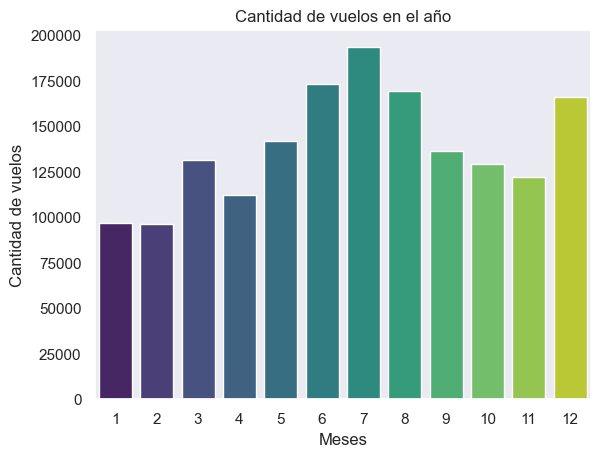

In [ ]:
sns.barplot(x= 'Month', y= 'Flights Booked', data=df_por_mes, palette='viridis')


plt.title('Cantidad de vuelos en el año')
plt.xlabel('Meses')
plt.ylabel('Cantidad de vuelos');

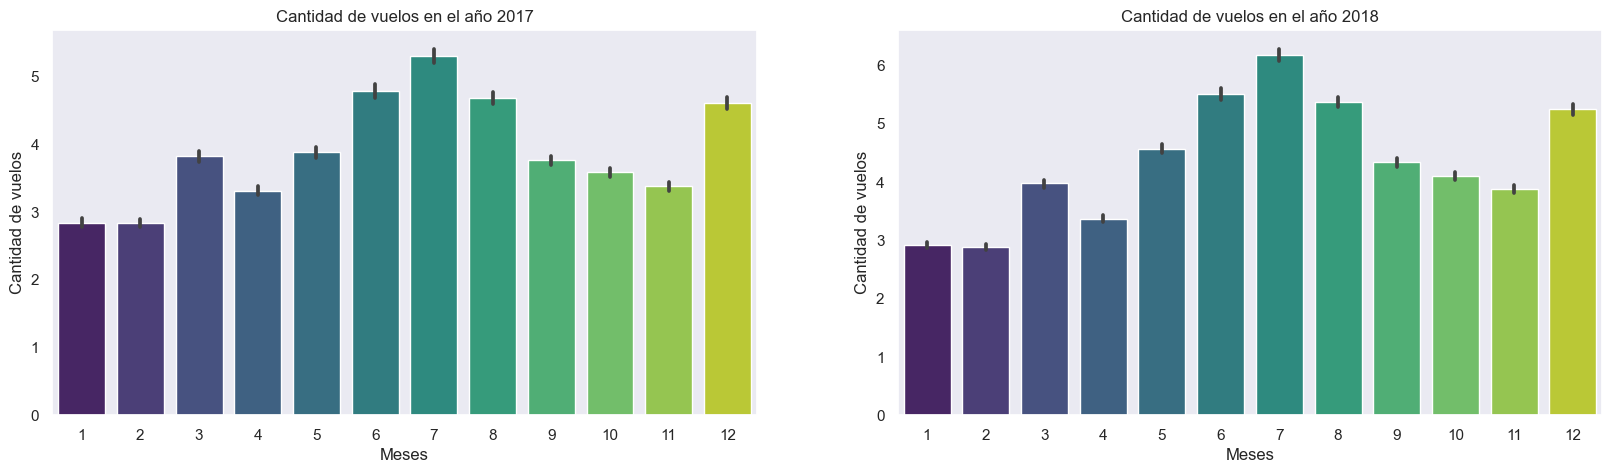

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.barplot(x= 'Month', y= 'Flights Booked', data=df_vuelos_años[df_vuelos_años['Year'] == 2017], ax=axes[0],palette='viridis')
sns.barplot(x= 'Month', y= 'Flights Booked', data=df_vuelos_años[df_vuelos_años['Year'] == 2018], ax=axes[1], palette='viridis')

axes[0].set_title('Cantidad de vuelos en el año 2017')
axes[0].set_xlabel('Meses')
axes[0].set_ylabel('Cantidad de vuelos')

axes[1].set_title('Cantidad de vuelos en el año 2018')
axes[1].set_xlabel('Meses')
axes[1].set_ylabel('Cantidad de vuelos');

Podemos ver en el gráfico anterior que los vuelvos por meses em los diferentes años es bastante similar. A simple vista se ve una pequeña variación en el primer trismestre del 2018

 - ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

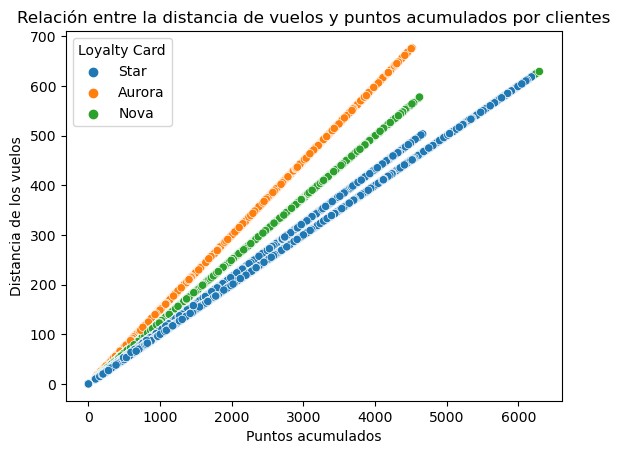

In [25]:
sns.scatterplot(y='Points Accumulated', x= 'Distance', data=df_final, hue='Loyalty Card')

plt.xlabel('Puntos acumulados')
plt.ylabel('Distancia de los vuelos')
plt.title('Relación entre la distancia de vuelos y puntos acumulados por clientes');


 - ¿Cuál es la distribución de los clientes por provincia o estado?

In [ ]:
#Lo que hago es trabajar con un dataframe que me elimine los clientees duplicados. ya que un cliente puede 
#hacer  mas de un vuelo pero su informacion personal es la misma
df_distribucion = df_final[['Loyalty Number', 'Province', 'City']]
df_distribucion.groupby('Province')['Loyalty Number'].count()


Province
Alberta                  23360
British Columbia        106442
Manitoba                 15900
New Brunswick            15352
Newfoundland              6244
Nova Scotia              12507
Ontario                 130258
Prince Edward Island      1584
Quebec                   79573
Saskatchewan              9861
Yukon                     2679
Name: Loyalty Number, dtype: int64

In [ ]:
df_sin_dupli= df_distribucion[['Loyalty Number', 'Province']].drop_duplicates()

In [ ]:
df_sin_dupli_agrupados= df_sin_dupli.groupby('Province')['Loyalty Number'].count().reset_index()

In [ ]:
df_sin_dupli_agrupados

,Province,Loyalty Number
0,Alberta,969
1,British Columbia,4409
2,Manitoba,658
3,New Brunswick,636
4,Newfoundland,258
5,Nova Scotia,518
6,Ontario,5404
7,Prince Edward Island,66
8,Quebec,3300
9,Saskatchewan,409


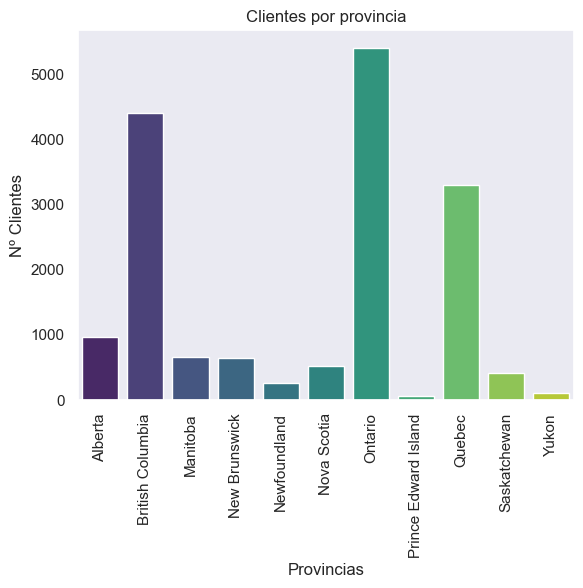

In [ ]:
sns.barplot(x = "Province", y= 'Loyalty Number',
        data = df_sin_dupli_agrupados,
        palette='viridis')
plt.style.use('Solarize_Light2')
sns.set_theme(style="dark")
plt.xticks(rotation = 90)

plt.title('Clientes por provincia')
plt.xlabel("Provincias")
plt.ylabel("Nº Clientes"); 

- ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


In [ ]:
#Filtro para quedarme solamente con la categoria educativas que tengan salarios
df_slario_sin_desconocidos = df_final[df_final['Salary']!= 'Unknown']

In [ ]:
#Paso la variable salario a float 
df_slario_sin_desconocidos['Salary'] = df_slario_sin_desconocidos['Salary'].astype(float)

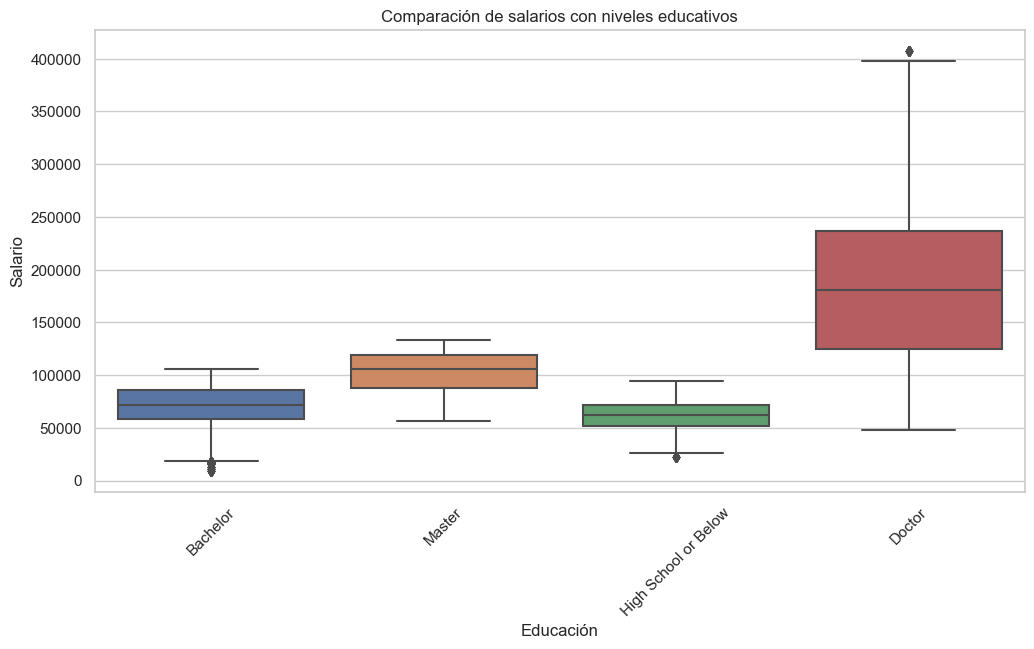

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='Salary', data=df_slario_sin_desconocidos)

sns.set_style("whitegrid")
plt.xlabel('Educación')
plt.ylabel('Salario')
plt.title('Comparación de salarios con niveles educativos')
plt.xticks(rotation=45)
plt.show()

 - ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [ ]:
#En proporcion trabajar con el data frame entero o con los valores unicos da el mismo resultado
df_eliminados = df_final[['Loyalty Number', 'Loyalty Card']].drop_duplicates()

In [ ]:
df_eliminados

,Loyalty Number,Loyalty Card
0,480934,Star
24,549612,Star
48,429460,Star
72,608370,Star
96,530508,Star
...,...,...
403640,823768,Star
403664,680886,Star
403688,776187,Star
403712,906428,Star


In [ ]:
df_card = df_eliminados.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
df_card 

,Loyalty Card,Loyalty Number
0,Aurora,3429
1,Nova,5671
2,Star,7637


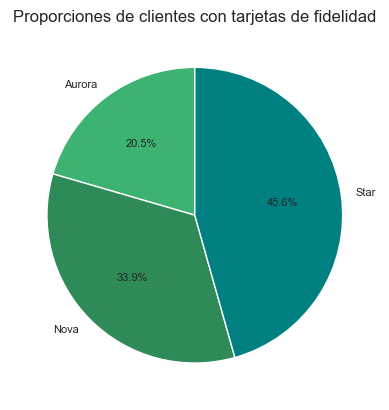

In [ ]:
colores =["mediumseagreen", "seagreen", "teal"]
plt.pie(df_card["Loyalty Number"].unique(), labels='Loyalty Card',
        data = df_card, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90)

plt.title('Proporciones de clientes con tarjetas de fidelidad');

 - ¿Cómo se distribuyen los clientes según su estado civil y género?

In [ ]:
df_marital = df_final[['Loyalty Number', 'Marital Status', 'Gender']].drop_duplicates()
df_marital 

,Loyalty Number,Marital Status,Gender
0,480934,Married,Female
24,549612,Divorced,Male
48,429460,Single,Male
72,608370,Single,Male
96,530508,Married,Male
...,...,...,...
403640,823768,Married,Female
403664,680886,Married,Female
403688,776187,Single,Male
403712,906428,Married,Male


In [ ]:
df_marital_agrupados = df_marital.groupby('Marital Status')['Loyalty Number'].count().reset_index()
df_marital_agrupados

,Marital Status,Loyalty Number
0,Divorced,2518
1,Married,9735
2,Single,4484


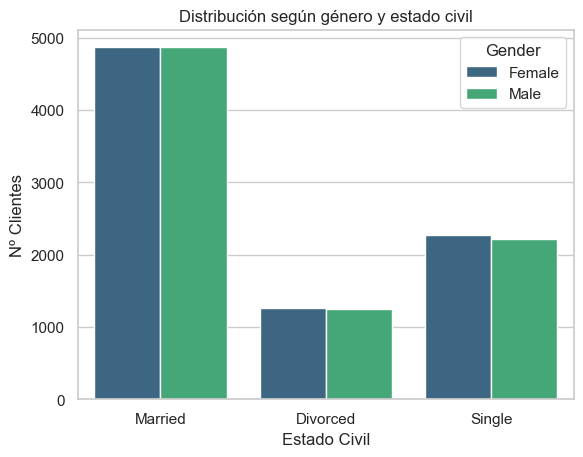

In [ ]:
sns.countplot(x = 'Marital Status', data=df_marital, hue='Gender',palette = "viridis")

sns.set_theme(style="dark")
plt.title('Distribución según género y estado civil')
plt.ylabel('Nº Clientes')
plt.xlabel('Estado Civil');

Podemos ver que la distribución entre genero y estado civil es bastante similar. No se ven grandes diferencias 

- Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas 
seguir son:

Preparación de Datos:

 - Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

Análisis Descriptivo:

 - Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

Prueba Estadística:

  - Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [ ]:
df_final['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [ ]:
#preparamos los datos

df_nuevo= df_final[['Loyalty Number','Flights Booked','Education']]
df_nuevo

,Loyalty Number,Flights Booked,Education
0,480934,0,Bachelor
1,480934,3,Bachelor
2,480934,0,Bachelor
3,480934,0,Bachelor
4,480934,6,Bachelor
...,...,...,...
403755,652627,0,Bachelor
403756,652627,0,Bachelor
403757,652627,0,Bachelor
403758,652627,0,Bachelor


In [ ]:
def categorizar_grupos(educacion):
    if educacion == 'Bachelor' or educacion == 'High School or Below':
        return "educación básica"
    else:
        return "educación superior"

In [ ]:
df_nuevo['Category'] = df_nuevo['Education'].apply(categorizar_grupos)

In [ ]:
#Agrupamos el data frame nuevo por Loyalty Number y sumamos la cantidad de vuelos por Cliente
#El objetivo es eliminar los los loyalty number duplicados
df_1 = df_nuevo.groupby('Loyalty Number')['Flights Booked'].sum().reset_index()
df_1.head()

,Loyalty Number,Flights Booked
0,100018,157
1,100102,173
2,100140,152
3,100214,79
4,100272,127


In [ ]:
#Eliminamos los duplicados de loyalty number, agregamos Catgory y creamos un data frame que uniremos con el anterior para agregarle la columna Flights Booked
df_2=df_nuevo[['Loyalty Number','Category']].drop_duplicates()
df_2


,Loyalty Number,Category
0,480934,educación básica
24,549612,educación superior
48,429460,educación superior
72,608370,educación superior
96,530508,educación básica
...,...,...
403640,823768,educación superior
403664,680886,educación básica
403688,776187,educación superior
403712,906428,educación básica


In [ ]:
#Este es el da frame sin duplicados que utilizare para el A/B testing
df_ab=df_1.merge(df_2, how='inner', on='Loyalty Number')

In [ ]:
df_ab.columns

Index(['Loyalty Number', 'Flights Booked', 'Category'], dtype='object')

In [ ]:
df_ab.groupby('Category')['Flights Booked'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
educación básica,11257.00,99.24,54.28,0.00,59.00,113.00,139.00,354.00
educación superior,5480.00,100.74,54.42,0.00,62.75,113.00,140.00,324.00


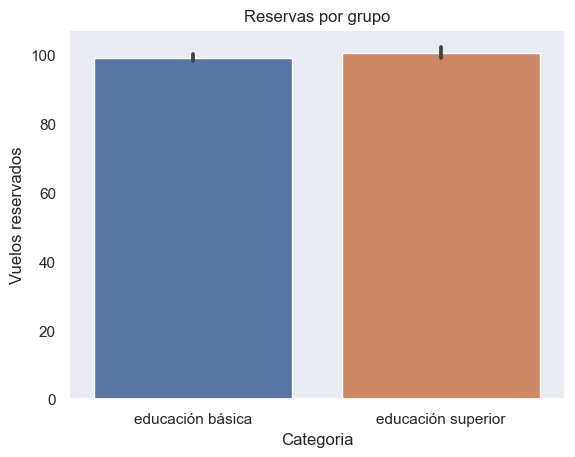

In [ ]:
sns.barplot(x="Category", y="Flights Booked", data=df_ab)
plt.style.use('Solarize_Light2')
sns.set_theme(style="dark")

plt.xlabel('Categoria')
plt.ylabel('Vuelos reservados')
plt.title("Reservas por grupo");

Primero vamos a evaluar si se cumple la Normalidad de los datos, la homogeneidad de las varianzas y la independencia de las observaciones

Este tipo de test, Shapiro se utiliza para evaluar si una columna sigue una distribución normal
- `statistic`: El valor estadístico del test de Shapiro-Wilk, que se utiliza para evaluar si los datos siguen una distribución normal. Cuanto mayor sea este valor, más probable es que los datos sean normales.

- `p_value`: El valor p (p-value) asociado al test de Shapiro-Wilk, que indica cuán significativa es la desviación de la normalidad. Un valor p pequeño sugiere que los datos no siguen una distribución normal.

In [ ]:
def normalidad(dataframe, columna):
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [ ]:
normalidad(df_ab, 'Flights Booked')

Para la columna Flights Booked los datos no siguen una distribución normal.


El test de Levene se utiliza para evaluar la homogeneidad de varianza entre dos o más grupos de datos.Se utiliza para determinar si las varianzas en estos grupos son aproximadamente iguales o si hay diferencias significativas entre ellas.

- La hipótesis nula (H0) es que las varianzas son iguales en todos los grupos
- hipótesis alternativa (H1) es que al menos una de las varianzas es diferente.


In [ ]:
def homogeneidad (dataframe, columna, columna_metrica):
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")


In [ ]:
homogeneidad(df_ab, 'Category', 'Flights Booked')

Para la métrica Flights Booked las varianzas son homogéneas entre grupos.


En este caso como no siguen una dsitribución normal, optamos por las pruebas no paramétricas Test de Mann Whitney.  Este test es una prueba estadística no paramétrica utilizada para comparar dos muestras independientes y determinar si provienen de poblaciones con medianas iguales o diferentes. Como ya hemos dicho, esta prueba es apropiada cuando los datos no siguen una distribución normal y se utiliza para evaluar si hay diferencias significativas entre dos grupos.

In [ ]:
def test_man_whitney(dataframe, columna, grupo_basico, grupo_superior, columna_grupos = "Category"):

    # filtramos el DataFrame para quedarnos solo con los datos del grupo de educacion basica
    grupo_basico= dataframe[dataframe[columna_grupos] == grupo_basico]['Flights Booked']
    
    # filtramos el DataFrame para quedarnos solo con los datos del grupo de educacion superior
    grupo_superior = dataframe[dataframe[columna_grupos] == grupo_superior]['Flights Booked']
    
     
    u_statistic, p_value = stats.mannwhitneyu(grupo_basico, grupo_superior) 

    if p_value < 0.05:
        print(f"Para la métrica Flihgts Booked las medianas son diferentes.")
    else:
        print(f"Para la métrica Flights Booked, las medianas son iguales.")


test_man_whitney(df_ab,'Flihgts Booked', "educación básica", "educación superior" )

Para la métrica Flights Booked, las medianas son iguales.


In [ ]:
df_ab['Category'].value_counts()

educación básica      11257
educación superior     5480
Name: Category, dtype: int64

Podemos concluir que no existe una diferencia entre los vuelos reservados por categorias pero tambien vemos que si bien la categoria educacion básica tiene mas observaciones que la educacion superior poddriamos decir que las personas que estan dentro de la categoria superior hacen mas reservas.